In [1]:
import os
import glob

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(17)

Dataset [CICIDS 2017](https://www.kaggle.com/datasets/cicdataset/cicids2017) 

In [3]:
# DATA_PATH = "/home/vanes/Mephi/Diploma/data/archive/MachineLearningCSV/MachineLearningCVE"
DATA_PATH = '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE'

In [4]:
all_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))
all_files

['/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',
 '/home/churilov/data/other/Mephi/CICIDS_2017/MachineLearningCSV/Machi

In [5]:
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df[' Label'].value_counts(normalize=True)

BENIGN                        0.803004
DoS Hulk                      0.081630
PortScan                      0.056144
DDoS                          0.045227
DoS GoldenEye                 0.003636
FTP-Patator                   0.002804
SSH-Patator                   0.002083
DoS slowloris                 0.002048
DoS Slowhttptest              0.001943
Bot                           0.000695
Web Attack � Brute Force      0.000532
Web Attack � XSS              0.000230
Infiltration                  0.000013
Web Attack � Sql Injection    0.000007
Heartbleed                    0.000004
Name:  Label, dtype: float64

In [7]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
# df = pd.read_csv(all_files[:4])
df.shape

(2830743, 79)

In [9]:
# m = df.loc[df[' Flow Packets/s'] != np.inf,' Flow Packets/s'].max()
# df[' Flow Packets/s'].replace(np.inf,m,inplace=True)
# m = df.loc[df['Flow Bytes/s'] != np.inf,'Flow Bytes/s'].max()
# df['Flow Bytes/s'].replace(np.inf,m,inplace=True)

In [10]:
df.isna().sum().sum()

1358

In [11]:
df.dropna(inplace = True)

In [12]:
# from sklearn.model_selection import StratifiedKFold
# df['folds'] = 0
# skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# for i, (_, test_index) in enumerate(skf.split(df[[' Destination Port']], df[' Label'])):
#     df.iloc[test_index, -1] = i

In [13]:
# df = pd.get_dummies(df)

In [14]:
col = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max',
       ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']

In [15]:
# train_df= df[df['folds'] != 5].copy()
# valid_df = df[df['folds'] == 5].copy()

In [16]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [17]:
anomaly_cols = ['DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed']

anomaly_cols_map = {col:-1 for col in anomaly_cols}
anomaly_cols_map['BENIGN'] = 1

df[' Label'] = df[' Label'].map(anomaly_cols_map)

In [18]:
df = clean_dataset(df)

In [25]:
X, y = df.drop(' Label', axis=1), df[' Label']

In [20]:
%%time


from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

model = IsolationForest(max_samples=10000, random_state=rng, n_jobs=-1)
model.fit(X)

CPU times: user 2min 35s, sys: 2min 53s, total: 5min 29s
Wall time: 36.8 s


IsolationForest(max_samples=10000, n_jobs=-1,
                random_state=RandomState(MT19937) at 0x7F8E5C059240)

In [21]:
y_pred = model.predict(X)
print(y_pred)
print(y_pred.shape)

print("percentage of Legit:", (list(y_pred).count(1)/y_pred.shape[0])*100)
print("percentage of Anomaly:",(list(y_pred).count(-1)/y_pred.shape[0])*100)

[1 1 1 ... 1 1 1]
(2827876,)
percentage of Legit: 98.3108877475533
percentage of Anomaly: 1.6891122524467128


In [26]:
np.unique(y)

array([-1.,  1.])

In [84]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cf_matrix.ravel()
cf_matrix

array([[   8556,  548000],
       [  39210, 2232110]])

In [81]:
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print("Recall", recall, "\nPrecision", precision)

Recall 1.0 
Precision 0.5


In [82]:
f1 = 2 * (precision*recall)/(precision+recall)
print("F1 Score", f1)

F1 Score 0.6666666666666666


In [75]:


# print(classification_report(y, y_pred))

In [69]:
recall_score(y, y_pred)

0.9827369106951024

In [30]:
y.value_counts(normalize=True)

 1.0    0.803189
-1.0    0.196811
Name:  Label, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [22]:
# X_train_all, X_test, y_train_all, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [23]:
X_train_all_clean, y_train_all_clean = X_train_all[y_train_all!=1], y_train_all[y_train_all!=1]

In [24]:
# X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(
#     X_train_all_clean, y_train_all_clean, test_size=0.2, random_state=17)

In [23]:
# a = np.unique(y_train_all, return_counts=True)
# a[0], a[1]/a[1].sum()

In [26]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_df[col] = scaler.fit_transform(train_df[col])
# valid_df[col] = scaler.transform(valid_df[col])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [25]:
def optimal_threshold(pred_proba, y_test):
    # Youden’s J statistic - при каком значении threshold график достигает 
    # ближайшей точке к (0, 1) на ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    J = tpr - fpr
    ix = np.argmax(J)
    print(f'Best threshold by Youden’s J statistic: {round(thresholds[ix], 3)}')

    # Определение threshold при помощи максимизации F-Score
    pr, rec, thresholds = precision_recall_curve(y_test, pred_proba)
    fscore = (2 * pr * rec) / (pr + rec)
    ix = np.argmax(fscore)
    print(f'Best threshold by optimising F-score: {round(thresholds[ix], 3)}, F-Score={round(fscore[ix], 3)}')
    
def custom_classification_report(y_test, pred_proba, threshold):
    print(f'threshold:{threshold}')
    pred_proba = np.array(pred_proba)
    pred[pred_proba>=threshold] = 1
    pred[pred_proba<threshold] = 0
    print(classification_report(y_test, pred))
    
def print_corves(pred_proba, y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
    fig.suptitle('Metrics')

    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    ax1.plot([0,1], [0,1], linestyle='--', label='No Skill')
    ax1.plot(fpr, tpr, marker='.', label='Logistic')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend()
    ax1.set_title('ROC curve')

    pr, rec, thresholds = precision_recall_curve(y_test, pred_proba)
    ax2.plot(thresholds, pr[:-1], c ='r', label ='PRECISION')
    ax2.plot(thresholds, rec[:-1], c ='b', label ='RECALL')
    ax2.grid()
    ax2.legend()
    ax2.set_title('Precision-Recall Curve')
    plt.show();
    
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(ax=ax)
    plt.show();

In [26]:
import time

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

In [31]:
outliers_fraction = 0.19

In [32]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction, novelty=True),
    ),
]

In [41]:
%%time

iso = IsolationForest(max_samples=10000, random_state=42, n)
# lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction, novelty=True)
# iso.fit(X_train_clean)

y_pred_ = iso.fit(X_train_all)

CPU times: user 51.3 s, sys: 42.5 s, total: 1min 33s
Wall time: 1min 33s


In [42]:
y_pred_ = iso.predict(X_train_all)

In [35]:
a = np.unique(y_pred_, return_counts=True)
a[0], a[1]/a[1].sum()

(array([-1,  1]), array([0.19096284, 0.80903716]))

In [36]:
# y_pred = y_pred_.copy()
# y_pred[y_pred_== 1] = 0
# y_pred[y_pred_==-1] = 1

In [43]:
print(classification_report(y_train_all, y_pred_))

              precision    recall  f1-score   support

        -1.0       0.21      0.02      0.04    444919
         1.0       0.80      0.98      0.88   1817381

    accuracy                           0.79   2262300
   macro avg       0.51      0.50      0.46   2262300
weighted avg       0.69      0.79      0.72   2262300



In [37]:
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

        -1.0       0.47      0.45      0.46    111637
         1.0       0.87      0.87      0.87    453939

    accuracy                           0.79    565576
   macro avg       0.67      0.66      0.67    565576
weighted avg       0.79      0.79      0.79    565576



In [ ]:
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(X_train_clean)
    t1 = time.time()
    
    algorithm.fit(X_train_all_clean)
    y_pred_ = algorithm.predict(X_test)
    # y_pred = y_pred_.copy()
    # y_pred[y_pred_== 1] = 0
    # y_pred[y_pred_==-1] = 1
        
    print('\n\n', name, ("%.2fs" % (t1 - t0)).lstrip("0"))
    print(classification_report(y_test, y_pred_))

/home/churilov/env/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/churilov/env/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(




 Robust covariance 180.62s
              precision    recall  f1-score   support

        -1.0       0.12      0.01      0.02    111637
         1.0       0.80      0.98      0.88    453939

    accuracy                           0.79    565576
   macro avg       0.46      0.50      0.45    565576
weighted avg       0.67      0.79      0.71    565576



In [75]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [76]:
pred = logreg.predict(X_test)
print('logreg:\n', classification_report(y_test, pred))

logreg:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     37803
         1.0       0.86      0.33      0.48       380

    accuracy                           0.99     38183
   macro avg       0.93      0.67      0.74     38183
weighted avg       0.99      0.99      0.99     38183



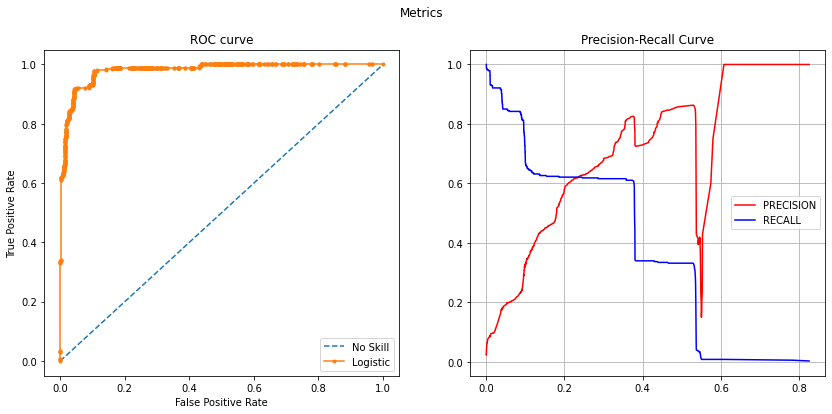

In [78]:
pred_proba = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
pred_proba = pred_proba[:, 1]
print_corves(pred_proba, y_test)

In [83]:
model = logreg
pred_proba = model.predict_proba(X_test)
pred_proba = pred_proba[:, 1]

optimal_threshold(pred_proba, y_test)

Best threshold by Youden’s J statistic: 0.009
Best threshold by optimising F-score: 0.373, F-Score=0.702


In [84]:
threshold = 0.009

pred_proba[pred_proba>=threshold] = 1
pred_proba[pred_proba< threshold] = 0

print(f'logreg (threshold={threshold}):\n', classification_report(y_test, pred_proba))

logreg (threshold=0.009):
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     37803
         1.0       0.08      0.98      0.16       380

    accuracy                           0.89     38183
   macro avg       0.54      0.94      0.55     38183
weighted avg       0.99      0.89      0.94     38183



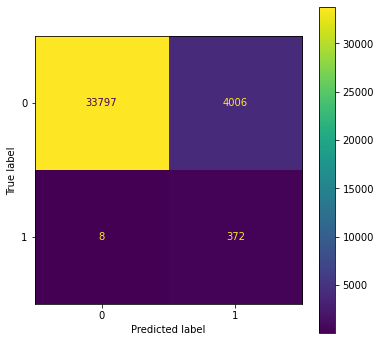

In [87]:
plot_confusion_matrix(y_test, pred_proba)